# 1. Data profiling

---

### Setup

---

In [5]:
import sys
sys.path.insert(1, '../utils')

import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# 1024 binary molecular fingerprints and 1 experimental class
column_names = ["bmf" + str(i) for i in range(1, 1025)] + ["exp"]

data = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=0, names = column_names)
data.shape

(8991, 1025)

## 1.1. Data dimensionality

---

### Number of records/variables

---

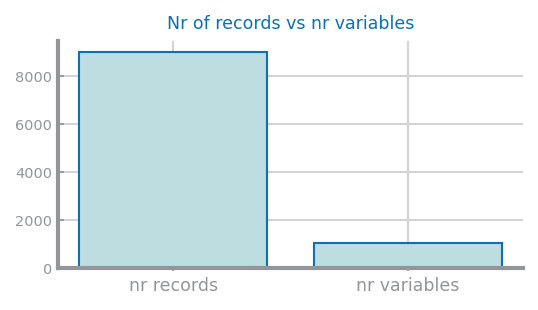

In [6]:
plt.figure(figsize=(4,2))
values = {'nr records': data.shape[0], 'nr variables': data.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs nr variables')

### Data types

---

In [7]:
data.dtypes

bmf1        int64
bmf2        int64
bmf3        int64
bmf4        int64
bmf5        int64
            ...  
bmf1021     int64
bmf1022     int64
bmf1023     int64
bmf1024     int64
exp        object
Length: 1025, dtype: object

In [8]:
cat_vars = data.select_dtypes(include='object')
data[cat_vars.columns] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))
cat_vars = data.select_dtypes(include='int64')
data[cat_vars.columns] = data.select_dtypes(['int64']).apply(lambda x: x.astype('boolean'))
data.dtypes

bmf1        boolean
bmf2        boolean
bmf3        boolean
bmf4        boolean
bmf5        boolean
             ...   
bmf1021     boolean
bmf1022     boolean
bmf1023     boolean
bmf1024     boolean
exp        category
Length: 1025, dtype: object

### Missing values

---

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

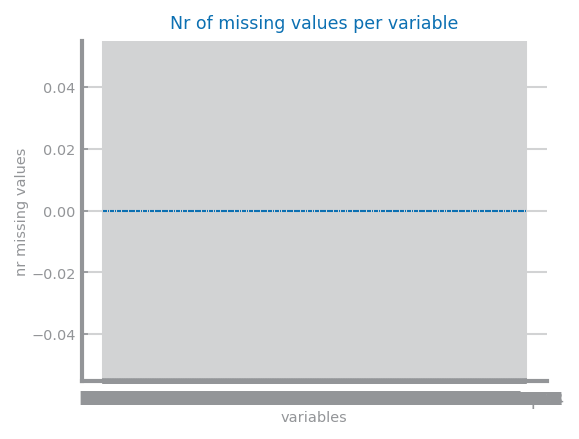

In [9]:
plt.figure()
mv = {}
for var in data:
    mv[var] = data[var].isna().sum()
ds.bar_chart(mv.keys(), mv.values(), title='Nr of missing values per variable',
               xlabel='variables', ylabel='nr missing values')
mv.values()

### Summary

* There are 8991 records and 1025 variables
    * This implies a ratio of approximately 8.772 records per variable
* Variable information:
    * 1024 binary molecular fingerprints - boolean values
    * 1 experimental class - category
* There are no missing values in the dataset

***How many variables are there in the dataset?***

***1025*** variables

***And how many records?***

***8991*** records

***What is the ratio between the number of records and variables?***

There is a ratio of ***23*** records per variable.

***What are the types for each variable?***

## 1.2. Data Granularity

---

### Summary

***What is the most atomic granularity for each variable?***

It will be equal to the number of different values the each variable takes :

In [10]:
print(data.nunique())

bmf1       2
bmf2       2
bmf3       2
bmf4       2
bmf5       2
          ..
bmf1021    2
bmf1022    2
bmf1023    2
bmf1024    2
exp        2
Length: 1025, dtype: int64


Because all variables are boolean, it will be 2 to all of them.

***What is the best granularity to discretize each numeric variable?***

Since, like we said above, all variables are of type boolean, they're already discretized.

***Are there any hierarchy of concepts for symbolic variables, either from data or domain knowledge?***
    
**No**, there isn't any hierarchy of concepts for those symbolic variables.